In [1]:
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
ES_Compatible = pd.read_csv('ES_Compatible.csv', parse_dates=[1])
print("-")
EB_Compatible = pd.read_csv('EB_Compatible.csv', parse_dates=[1])
print("-")
W_Compatible = pd.read_csv('W_Compatible.csv', parse_dates=[1])
print("-")
ES_Compatible.drop(columns='Unnamed: 0')
EB_Compatible.drop(columns='Unnamed: 0')
W_Compatible.drop(columns='Unnamed: 0')
ES=pd.DataFrame()
ES['DateTime']=ES_Compatible['DateTime']
ES['Salinity_ppt']=ES_Compatible['Salinity_ppt']
ES['pH']=ES_Compatible['pH']
ES['DO_mg/L']=ES_Compatible['DO_mg/L']
ES['Turb_NTU']=ES_Compatible['Turb_NTU']
ES['Chl_ug/L']=ES_Compatible['Chl_ug/L']
ES['Temp_C']=ES_Compatible['Temp_C']
EB=pd.DataFrame()
EB['DateTime']=EB_Compatible['DateTime']
EB['Salinity_ppt']=EB_Compatible['Salinity_ppt']
EB['pH']=EB_Compatible['pH']
EB['DO_mg/L']=EB_Compatible['DO_mg/L']
EB['Turb_NTU']=EB_Compatible['Turb_NTU']
EB['Chl_ug/L']=EB_Compatible['Chl_ug/L']
EB['Temp_C']=EB_Compatible['Temp_C']
W=pd.DataFrame()
W['DateTime']=W_Compatible['DateTime']
W['Salinity_ppt']=W_Compatible['Salinity_ppt']
W['pH']=W_Compatible['pH']
W['DO_mg/L']=W_Compatible['DO_mg/L']
W['Turb_NTU']=W_Compatible['Turb_NTU']
W['Chl_ug/L']=W_Compatible['Chl_ug/L']
W['Temp_C']=W_Compatible['Temp_C']
ES = ES.set_index('DateTime')
EB = EB.set_index('DateTime')
W = W.set_index('DateTime')
ES['DateTime']=ES.index
EB['DateTime']=EB.index
W['DateTime']=W.index



-
-
-


In [4]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!jupyter serverextension enable voila --sys-prefix

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Enabling: voila
- Writing config: C:\Users\Jones\Anaconda3\etc\jupyter
    - Validating...
      voila 0.2.10 ok


In [5]:
def DPlot(Datasets,DataPoints,Scale,StartDate,EndDate,figx,figy,Style):
    figsize(figx,figy)
    ax = plt.gca()
    plt.style.use(Style)
    if Scale == 2:
        plt.yscale('log')
    for ds in Datasets:
        if ds == 'East Surface':
            df=ES.loc[StartDate:EndDate]
        elif ds == 'East Bottom':
            df=EB.loc[StartDate:EndDate]
        else:
            df=W.loc[StartDate:EndDate]
        for dp in DataPoints:
            df.plot('DateTime',dp,ax=ax, label = (ds, dp))

In [6]:
clear_output()
StartDate = widgets.DatePicker(description='Start Date')
EndDate = widgets.DatePicker(description='End Date')
Header = widgets.HTML(value='''<h1>Dαtα Ploting<h1>''')
DataToInclude = widgets.SelectMultiple(
    options=['East Surface', 'East Bottom', 'West'],
    value=['East Surface'],
    description='Datasets',
    disabled=False
)
DataPoints = widgets.SelectMultiple(
    options=['Salinity_ppt', 'pH', 'DO_mg/L','Turb_NTU','Chl_ug/L','Temp_C'],
    value=['pH'],
    #rows=10,
    description='Data',
    disabled=False
)
Scale = widgets.Dropdown(
    options=[('linear', 1), ('logarithmic', 2)],
    value=1,
    description='Scale',
)
Style = widgets.Dropdown(
    options=[('default', 'default'), ('classic', 'classic'),
             ('Solarize_Light2', 'Solarize_Light2'),('_classic_test_patch','_classic_test_patch'),
             ('bmh', 'bmh'),('dark_background', 'dark_background'),
             ('fast', 'fast'),('fivethirtyeight', 'fivethirtyeight'),
             ('ggplot', 'ggplot'),('grayscale', 'grayscale'),
             ('seaborn-colorblind', 'seaborn-colorblind'),('seaborn-dark', 'seaborn-dark'),
             ('seaborn-dark-palette', 'seaborn-dark-palette'),('seaborn-darkgrid', 'seaborn-darkgrid'),
             ('seaborn-deep', 'seaborn-deep'),('seaborn-muted', 'seaborn-muted'),
             ('seaborn-notebook', 'seaborn-notebook'),('seaborn-paper', 'seaborn-paper'),
             ('seaborn-pastel', 'seaborn-pastel'),('seaborn-poster', 'seaborn-poster'),
             ('seaborn-talk', 'seaborn-talk'),('seaborn-white', 'seaborn-white'),
             ('seaborn-whitegrid', 'seaborn-whitegrid'),('seaborn-colorblind10', 'seaborn-colorblind10')],
    value='default',
    description='Style',
)
figx=widgets.IntSlider(
    value=10,
    min=5,
    max=40,
    step=1,
    description='x axis size:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
figy=widgets.IntSlider(
    value=10,
    min=5,
    max=20,
    step=-1,
    description='Y axis Size:',
    disabled=False,
    continuous_update=False,
    orientation='Vertical',
    readout=True,
    readout_format='d'
)
fig = widgets.VBox([figy,figx])
def UpdateD():
    try:
        SD = datetime.strptime(str(StartDate.value),"%Y-%m-%d")
        ED = datetime.strptime(str(EndDate.value), "%Y-%m-%d")
        Range = ED-SD
        return(Range)
    except:
        pass
btn_plt = widgets.Button(
                description='Plot',
                tooltip='Plot',
                style={'description_width': 'initial'}
            )

output = widgets.Output()
def on_button_clicked(event):
    with output:
        clear_output()
        r = UpdateD()
        print(f".{StartDate.value}.. {r}...{DataPoints.value}")
    DPlot(DataToInclude.value,DataPoints.value,Scale.value,StartDate.value,EndDate.value,figx.value,figy.value,Style.value)     
btn_plt.on_click(on_button_clicked)
vbox_result = widgets.VBox([btn_plt, output])
vbox_Setup = widgets.VBox([Header,fig,DataToInclude,DataPoints,Scale,StartDate,EndDate,Style,vbox_result])

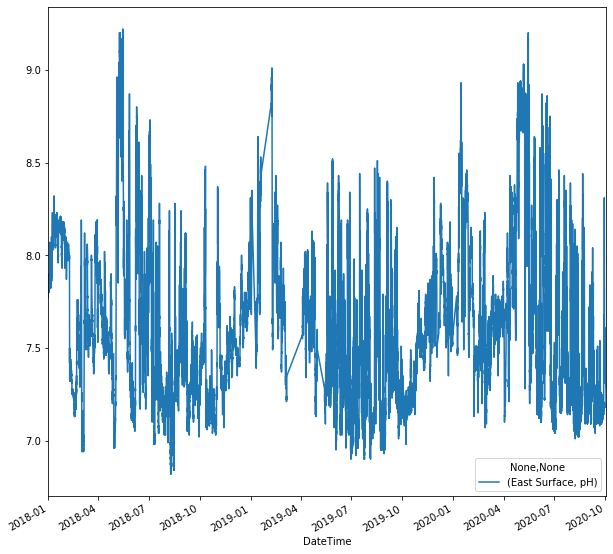

In [7]:
page = widgets.HBox([vbox_Setup])
display(page)